In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt      # Импорт библиотек для работы с данными
from pylab import rcParams
import seaborn as sns
import scipy.stats as stats

#  Парсинг данных

In [2]:
basa = pd.read_csv(r'H:\BD\us events ad_revenue filtered 03.02-07.02.csv', index_col=False) # загружаем базу данных

In [3]:
basa.head(10)

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
5,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:53,1644156953,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
6,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:03,1644156963,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
7,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:23,1644156983,2022-02-06 17:17:11,1644157031,cell,Verizon,US,NaN
8,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:33,1644156993,2022-02-06 17:17:11,1644157031,cell,Verizon,US,NaN
9,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:53,1644157013,2022-02-06 17:17:11,1644157031,cell,Verizon,US,NaN


In [4]:
df = basa.copy() #создаем копию датафрейма

In [5]:
print(basa['event_json'][10]) # посмотрим на значения, которые хранятся в столбце "event_json"

{"ad_type":"banner","placement":"","view_index":1,"session_view_index":0,"cur_ticks":637797358293422560,"session_length":102.8167,"revenue":0.000494196,"ads_ltv":0.0673200534258423,"ecpm_sma":1.39128303527832,"normalized_ecpm_sma":1.39128303527832,"value":0.000494196,"currency":"USD","ad_country_code":"US","network_name":"Google AdMob","ad_unit_id":"64c6b1114ea8c1cc","ad_network_placement":"ca-app-pub-7511632782617496/8825263691","creativeId":"CLjPjJii6_UCFUZCwQod28UPjg"}


In [6]:
def find_data(string, data):
    found_data = re.findall(f'"{data}":(.*?)(?=,)', string)  # функция, которая находит нужные значения в "event_json"
    return found_data[0]

In [7]:
df['ad_type'] =  [find_data(cell,'ad_type') for cell in df['event_json']]
df['placement'] = [find_data(cell,'placement') for cell in df['event_json']]
df['view_index'] =  [find_data(cell,'view_index') for cell in df['event_json']]
df['ads_ltv'] =  [find_data(cell,'ads_ltv') for cell in df['event_json']]
df['network_name'] =  [find_data(cell,'network_name') for cell in df['event_json']]              # достаем значения и создаем 
df['revenue'] =  [find_data(cell,'revenue') for cell in df['event_json']]                        # новые столбцы для них
df['session_length'] =  [find_data(cell,'session_length') for cell in df['event_json']]
df['ecpm_sma'] =  [find_data(cell,'ecpm_sma') for cell in df['event_json']]
df['normalized_ecpm_sma'] =  [find_data(cell,'normalized_ecpm_sma') for cell in df['event_json']]

In [8]:
def str_to_float(arg):              # функция, которая переводит строки в числа с плавающей запятой
    arg = float(arg)
    return arg

In [9]:
df['revenue'] = [str_to_float(cell) for cell in df['revenue']]
df['ecpm_sma'] = [str_to_float(cell) for cell in df['ecpm_sma']]                       # переводим доход от показа рекламы в float
df['normalized_ecpm_sma'] = [str_to_float(cell) for cell in df['normalized_ecpm_sma']]
df['ecpm'] = df['revenue']*1000

In [10]:
df.drop(columns=['revenue'],inplace=True )               # столбец revenue нам больше не нужен, так как создан столбец ecpm(ecpm = revenue*1000)
df.drop(columns=['event_json'],inplace=True )            # из столбца event_json мы уже достали все интересующие нас значения
df.drop(columns=['event_timestamp'],inplace=True )       # столбцы timestamp тоже можно убрать, так как для анализа нам понадобятся
df.drop(columns=['event_receive_timestamp'],inplace=True)# только столбцы datetime

In [11]:
df.head(10)

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_datetime,event_receive_datetime,connection_type,...,city,ad_type,placement,view_index,ads_ltv,network_name,session_length,ecpm_sma,normalized_ecpm_sma,ecpm
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:28,2022-02-06 17:58:19,wifi,...,Norwalk,"""banner""","""""",1,0.487876676518837,"""Google AdMob""",705.8807,0.511508,0.511508,0.510313
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:45,2022-02-06 17:58:19,wifi,...,Norwalk,"""banner""","""""",1,0.488386989518837,"""Google AdMob""",722.6512,0.511389,0.511389,0.510313
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,2022-02-05 17:53:05,2022-02-06 16:59:29,wifi,...,Charlotte,"""banner""","""""",1,0.67847875732725,"""APPLOVIN_EXCHANGE""",431.8129,0.928597,0.928597,2.386163
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:09:01,2022-02-06 17:09:24,wifi,...,Cocoa,"""int""","""next_level""",1,0.0138937835693359,"""AppLovin""",125.9496,13.782633,13.893784,13.893784
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:15:38,2022-02-06 17:16:16,cell,...,NaN,"""banner""","""""",1,0.0605709444258423,"""Google AdMob""",12.71129,1.660282,1.660282,6.827570
5,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:15:53,2022-02-06 17:16:16,cell,...,NaN,"""banner""","""""",1,0.0610651404258423,"""Google AdMob""",27.753,1.543673,1.543673,0.494196
6,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:16:03,2022-02-06 17:16:16,cell,...,NaN,"""banner""","""""",1,0.0634513029258423,"""APPLOVIN_EXCHANGE""",37.62716,1.627922,1.627922,2.386163
7,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:16:23,2022-02-06 17:17:11,cell,...,NaN,"""banner""","""""",1,0.0639454989258423,"""Google AdMob""",57.81027,1.514549,1.514549,0.494196
8,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:16:33,2022-02-06 17:17:11,cell,...,NaN,"""banner""","""""",1,0.0663316614258423,"""APPLOVIN_EXCHANGE""",67.62502,1.601711,1.601711,2.386163
9,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:16:53,2022-02-06 17:17:11,cell,...,NaN,"""banner""","""""",1,0.0668258574258423,"""Google AdMob""",87.8036,1.490959,1.490959,0.494196


In [12]:
# Пример данных
n = 100 
for i in range(len(df.values[n])): 
    print(i, " ", df.values[n][i])

0   JLpX1hhdpmD
1   11
2   TCL
3   TCL 10L
4   phone
5   en_US
6   c_ad_revenue
7   2022-02-06 15:46:55
8   2022-02-06 15:47:46
9   wifi
10   AT&T
11   US
12   Jamestown
13   "banner"
14   ""
15   1
16   0.571129981369536
17   "APPLOVIN_EXCHANGE"
18   1797.339
19   0.178478911519051
20   0.178478911519051
21   0.026212725


In [13]:
print(df['connection_type'].unique())
print(df['country_iso_code'].unique())  # посмотрим на некоторые уникальные значения 
print(df['network_name'].unique())
print(df['event_name'].unique())

['wifi' 'cell' 'unknown']
['US']
['"Google AdMob"' '"APPLOVIN_EXCHANGE"' '"AppLovin"' '"Facebook"']
['c_ad_revenue']


In [14]:
df.drop(columns=['connection_type'],inplace=True )   # тип соединения не понадобится для текущего анализа.(Хоть и не исключено наличие некоторой корреляции)
df.drop(columns=['country_iso_code'],inplace=True )  # country_iso_code содержит всего одно уникальное значение, поэтому не несет важной для анализа информации
df.drop(columns=['network_name'],inplace=True )      # network_name тоже можно убрать, так как корреляция маловероятна
df.drop(columns=['event_name'],inplace=True )        # тоже содержит всего одно значение

In [15]:
# print(df['device_manufacturer'].unique())
# print(df['city'].unique())                  #Здесь просматривались уникальные значения для других столбцов, но значений оказалось
# print(df['device_model'].unique())          #слишком много и их парсинг занял бы много времени, поэтому они останутся как есть
# print(df['operator_name'].unique())

In [16]:
print(df['device_locale'].unique())
print(df['os_version'].unique())
print(df['device_type'].unique())      #для этих столбцов необходим отдельный парсинг данных
print(df['placement'].unique())
print(df['ad_type'].unique())

['en_US' 'en_GB' 'en_NL' 'ko_KR' 'en_CA' 'fr_FR' 'en_IN' 'en_AU'
 'zh-Hant_TW']
['11' '10' '12' '9' '8.0.0' '6.0.1' '8.1.0' '7.0' '7.1.2' '7.1.1' '5.0.2']
['tablet' 'phone']
['""' '"next_level"' '"replay"' '"lose_offer_attempt"'
 '"game_repeating_reward"' '"double_coins"' '"game_repeating_reward_int"'
 '"lose_offer_attempt_int"' '"double_coins_int"']
['"banner"' '"int"' '"rv"']


In [17]:
df['device_locale'] = df['device_locale'].replace(to_replace=['en_', 'ko_', 'fr_'], value = '', regex=True) # уберем язык, оставив только страну
df['device_locale'] = df['device_locale'].replace(to_replace='zh-Hant_TW', value = 'unknown', regex=True)  

In [18]:
def os_to_float(os):       # функция, преобразовывающая версию ос в число с плавающей запятой
    if len(os) > 3:
        os = os[:3] + os[4]
    os = float(os)
    return os

In [19]:
df['os_version'] = [os_to_float(cell) for cell in df['os_version']]                         # применяем функцию
df['device_type'] = df['device_type'].replace(to_replace='tablet', value = 'T', regex=True) # заменим значения tablet и phone на более короткие обозначения
df['device_type'] = df['device_type'].replace(to_replace='phone', value = 'P', regex=True)  # 

для столбцов placement и ad_type преобразуем значения в более короткие аббревиатуры, чтобы легче было с ними работать

In [20]:
df['placement'] = df['placement'].replace(to_replace='"next_level"', value = 'N_LVL', regex=True)
df['placement'] = df['placement'].replace(to_replace='"replay"', value = 'RP', regex=True)
df['placement'] = df['placement'].replace(to_replace='"lose_offer_attempt"', value = 'L_OF', regex=True)
df['placement'] = df['placement'].replace(to_replace='"game_repeating_reward"', value = 'G_R_R', regex=True)
df['placement'] = df['placement'].replace(to_replace='"double_coins"', value = 'D_C', regex=True)
df['placement'] = df['placement'].replace(to_replace='"game_repeating_reward_int"', value = 'G_R_R_int', regex=True)
df['placement'] = df['placement'].replace(to_replace='"lose_offer_attempt_int"', value = 'L_OF_int', regex=True)
df['placement'] = df['placement'].replace(to_replace='"double_coins_int"', value = 'D_C_int', regex=True)
df['placement'] = df['placement'].replace(to_replace='"', value = '-', regex=True)

In [21]:
df['ad_type'] = df['ad_type'].replace(to_replace='"banner"', value = 'B', regex=True)
df['ad_type'] = df['ad_type'].replace(to_replace='"int"', value = 'I', regex=True)
df['ad_type'] = df['ad_type'].replace(to_replace='"rv"', value = 'RV', regex=True)

In [22]:
df['event_datetime'] = df['event_datetime'].replace(to_replace=r'\d+-\d+-\d+ ', value = '', regex=True)                # для аналази будем использовать только время дня
df['event_receive_datetime'] = df['event_receive_datetime'].replace(to_replace=r'\d+-\d+-\d+ ', value = '', regex=True)# поэтому год/месяц/число можно убрать

In [23]:
print(df['device_locale'].unique())
print(df['os_version'].unique())
print(df['device_type'].unique())      #проверим преобразования
print(df['placement'].unique())
print(df['ad_type'].unique())

['US' 'GB' 'NL' 'KR' 'CA' 'FR' 'IN' 'AU' 'unknown']
[11.   10.   12.    9.    8.    6.01  8.1   7.    7.12  7.11  5.02]
['T' 'P']
['--' 'N_LVL' 'RP' 'L_OF' 'G_R_R' 'D_C' 'G_R_R_int' 'L_OF_int' 'D_C_int']
['B' 'I' 'RV']


In [24]:
df.head(10) #Посмотрим на таблицу после парсинга

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_datetime,event_receive_datetime,operator_name,city,ad_type,placement,view_index,ads_ltv,session_length,ecpm_sma,normalized_ecpm_sma,ecpm
0,JLjpGzDHBQm,11.0,Samsung,Galaxy Tab S6,T,US,20:02:28,17:58:19,NaN,Norwalk,B,--,1,0.487876676518837,705.8807,0.511508,0.511508,0.510313
1,JLjpGzDHBQm,11.0,Samsung,Galaxy Tab S6,T,US,20:02:45,17:58:19,NaN,Norwalk,B,--,1,0.488386989518837,722.6512,0.511389,0.511389,0.510313
2,JLkVacrzHY6,11.0,Google,Pixel 2,P,US,17:53:05,16:59:29,Verizon,Charlotte,B,--,1,0.67847875732725,431.8129,0.928597,0.928597,2.386163
3,JMC6wG3cX0f,10.0,Samsung,Galaxy S9,P,US,17:09:01,17:09:24,T-Mobile,Cocoa,I,N_LVL,1,0.0138937835693359,125.9496,13.782633,13.893784,13.893784
4,JLzWWTJfi1b,10.0,Samsung,Galaxy S9,P,US,17:15:38,17:16:16,Verizon,NaN,B,--,1,0.0605709444258423,12.71129,1.660282,1.660282,6.827570
5,JLzWWTJfi1b,10.0,Samsung,Galaxy S9,P,US,17:15:53,17:16:16,Verizon,NaN,B,--,1,0.0610651404258423,27.753,1.543673,1.543673,0.494196
6,JLzWWTJfi1b,10.0,Samsung,Galaxy S9,P,US,17:16:03,17:16:16,Verizon,NaN,B,--,1,0.0634513029258423,37.62716,1.627922,1.627922,2.386163
7,JLzWWTJfi1b,10.0,Samsung,Galaxy S9,P,US,17:16:23,17:17:11,Verizon,NaN,B,--,1,0.0639454989258423,57.81027,1.514549,1.514549,0.494196
8,JLzWWTJfi1b,10.0,Samsung,Galaxy S9,P,US,17:16:33,17:17:11,Verizon,NaN,B,--,1,0.0663316614258423,67.62502,1.601711,1.601711,2.386163
9,JLzWWTJfi1b,10.0,Samsung,Galaxy S9,P,US,17:16:53,17:17:11,Verizon,NaN,B,--,1,0.0668258574258423,87.8036,1.490959,1.490959,0.494196


# Анализ данных

In [25]:
sns.set_style('darkgrid')

## Распределение средних ecpm-ов пользователей для баннеров.

In [26]:
mean_ecpm_banner = df[df['ad_type']=='B'].groupby('profile_id')['ecpm'].mean().sort_values(ascending = False)
mean_ecpm_int = df[df['ad_type']=='I'].groupby('profile_id')['ecpm'].mean().sort_values(ascending = False)
mean_ecpm_rv = df[df['ad_type']=='RV'].groupby('profile_id')['ecpm'].mean().sort_values(ascending = False)

Text(0, 0.5, 'частота')

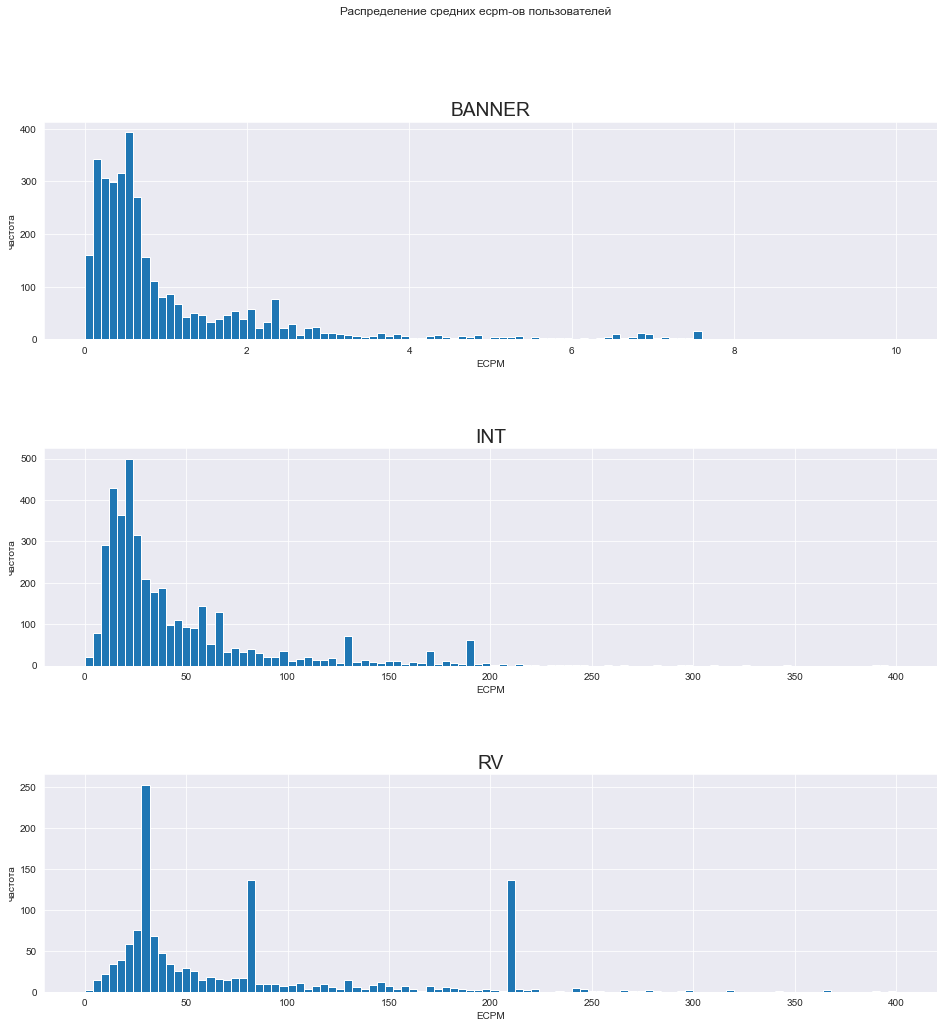

In [27]:
fig, axs = plt.subplots(3, 1)
plt.suptitle("Распределение средних ecpm-ов пользователей")
plt.rcParams['font.size'] = '16'
fig.subplots_adjust(hspace = 0.5)
fig.set_figheight(16)
fig.set_figwidth(16)
axs[0].hist(mean_ecpm_banner,bins = 100, range = (0,10))
axs[0].set_title('BANNER')
axs[0].set_xlabel('ECPM')
axs[0].set_ylabel('частота')
axs[1].hist(mean_ecpm_int,bins = 100, range = (0,400))
axs[1].set_title('INT')
axs[1].set_xlabel('ECPM')
axs[1].set_ylabel('частота')
axs[2].hist(mean_ecpm_rv,bins = 100, range = (0,400))
axs[2].set_title('RV')
axs[2].set_xlabel('ECPM')
axs[2].set_ylabel('частота')

In [28]:
interesting = mean_ecpm_rv > 200

In [29]:
len(interesting < 225)

1324

### У всех видов рекламы есть общая тенденция. Конкертные значения ECPM принесли большое количество реклам. Хотя есть и тенденция к снижению количества рекламных показов с увеличением ECPM, который они принесли.
### Самое интересное, на мой взгляд, происходит на графике с ECPM от рекламы, котрую пользователь смотрел по совему желанию (RV). Примерно 1300 пользователей, которые просматривали конкретную(судя по ECPM) рекламу добровольно, заинтересовались предложением. То же самое произошло в районе 80 ECPM. А между этими двумя значениями  — плато.
### С баннерами все иначе. Тенденция к снижению ECPM без значимых "всплесков активности"

In [30]:
dens_ecpm_banner = sorted(df[df['ad_type']=='B'].groupby('profile_id')['ecpm'].mean())
dens_ecpm_int = sorted(df[df['ad_type']=='I'].groupby('profile_id')['ecpm'].mean())
dens_ecpm_rv = sorted(df[df['ad_type']=='RV'].groupby('profile_id')['ecpm'].mean())
fit_banner = stats.norm.pdf(dens_ecpm_banner, np.mean(dens_ecpm_banner), np.std(dens_ecpm_banner))
fit_int = stats.norm.pdf(dens_ecpm_int, np.mean(dens_ecpm_int), np.std(dens_ecpm_int))
fit_rv = stats.norm.pdf(dens_ecpm_rv, np.mean(dens_ecpm_rv), np.std(dens_ecpm_rv))

Text(0, 0.5, 'Плотность вероятности')

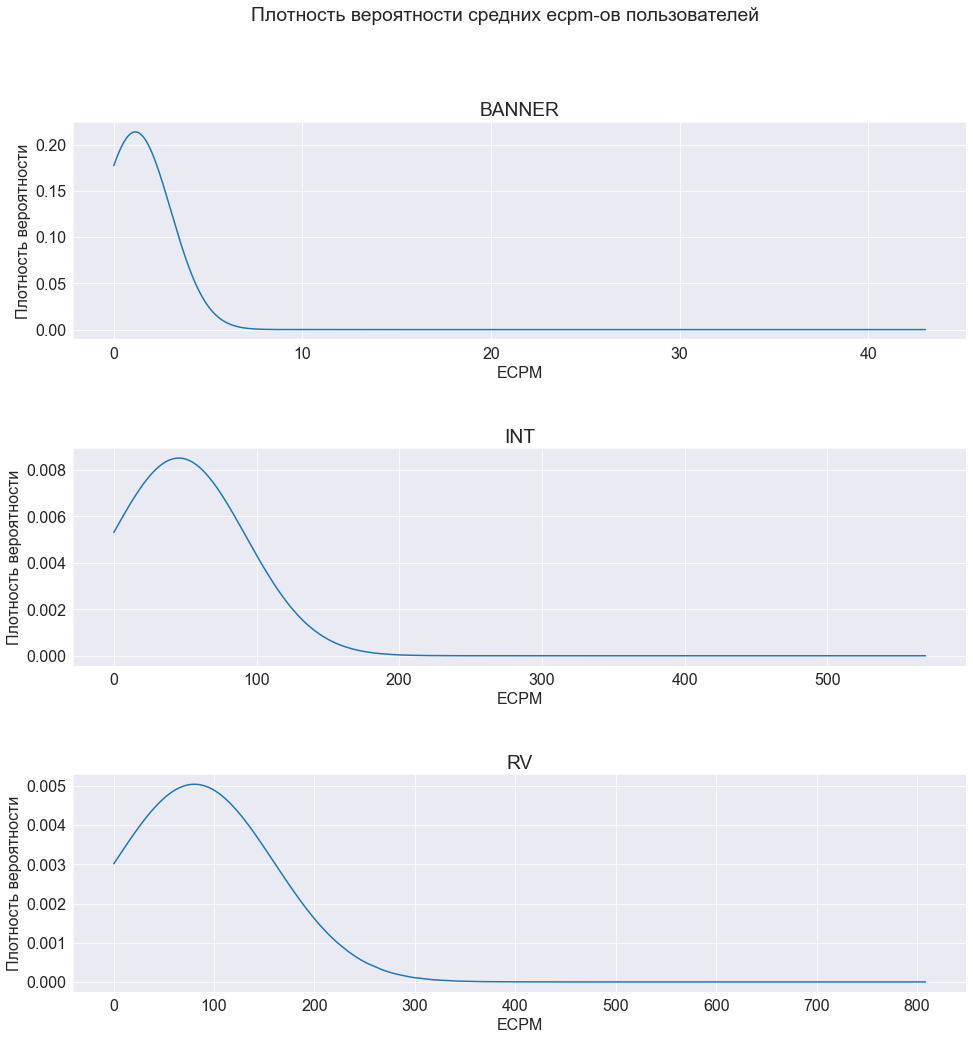

In [31]:
fig, axs = plt.subplots(3, 1)
plt.suptitle("Плотность вероятности средних ecpm-ов пользователей")
plt.rcParams['font.size'] = '16'
fig.subplots_adjust(hspace = 0.5)
fig.set_figheight(16)
fig.set_figwidth(16)
axs[0].plot(dens_ecpm_banner,fit_banner)
axs[0].set_title('BANNER')
axs[0].set_xlabel('ECPM')
axs[0].set_ylabel('Плотность вероятности')
axs[1].plot(dens_ecpm_int,fit_int)
axs[1].set_title('INT')
axs[1].set_xlabel('ECPM')
axs[1].set_ylabel('Плотность вероятности')
axs[2].plot(dens_ecpm_rv,fit_rv)
axs[2].set_title('RV')
axs[2].set_xlabel('ECPM')
axs[2].set_ylabel('Плотность вероятности')

In [32]:
big_user = []
for ecpm in mean_ecpm_banner:
    if ecpm > 8:
        big_user.append(i)

In [33]:
len(mean_ecpm_banner)           # Количество пользователей, которым был показан баннер

3508

In [34]:
len(big_user)           # Количество пользователей, которым был показан баннер с ecpm > 8

15

### 0,4% пользователей, которым был показан баннер приносят ECPM выше 8. Модой является ECPM чуть больше 1.
### Для других видов рекламы график ведет себя схожим образом, только с другими значениями
### Прошлый график был более информативным, так как выбросы в таких вещах полезны при изучении. А вот сглаживание данных в данном случае только вредит. К тому же, мода сдвигается вправо из-за больших значений ECPM малого количества выбросов.

In [35]:
print(len(df['city'].unique()))

921


In [36]:
city_ecpm = df.groupby('city')['ecpm'].mean().values

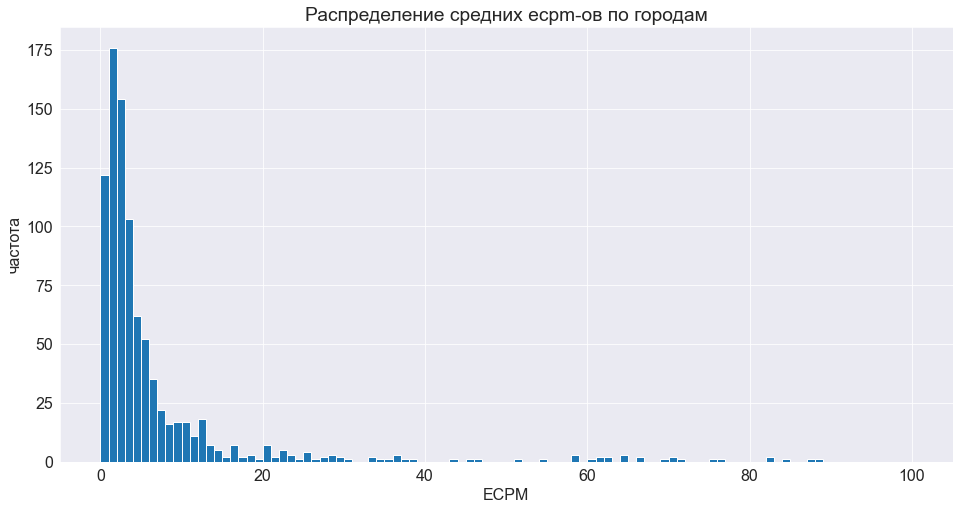

In [37]:
plt.figure(figsize=(16,8))
plt.hist(city_ecpm,bins = 100, range = (0,100)) 
plt.title('Распределение средних ecpm-ов по городам')
plt.xlabel('ECPM')
plt.ylabel('частота')
plt.show()

In [38]:
top_ecpm_city = df.groupby('city')['ecpm'].mean().sort_values(ascending = False)[:20]

In [39]:
top_ecpm_city

city
Rohnert Park      297.600000
Lake Worth        219.315372
Fredericksburg    214.480240
Owensboro         211.700000
Baton Rouge       198.166667
Santa Fe          191.400000
Pittsford         191.400000
Amery             191.400000
La Crosse         188.969105
Cartersville      171.400000
Santa Ana         131.000000
Torrance          131.000000
El Monte          130.000000
Chillicothe       130.000000
Berlin            130.000000
Southfield        130.000000
Lake Charles      130.000000
Suffolk           109.704651
Mountain View     102.075000
Keokuk             88.770264
Name: ecpm, dtype: float64

### Распределение по городам можно визуализировать несколькими способами:
### либо построить на графике зависимость частосты ECPM в разных городах в зависимости от величины ECPM (что и было сделано выше). Но городов слишком много, чтобы сделать какие-то выводы из такого графика. Выше выведен список городов с наибольшим средним ECPM.
### либо можно было сгруппировать города. Например, по срденей зарплате в городе, возрасту, стране. И строить уже зависимость ECPM от группы города. Это было бы очень информативной информацией, но такая группировка заняла бы длительное время.

In [40]:
os_ecpm_banner = df[df['ad_type']=='B'].groupby('os_version')['ecpm'].mean()
os_ecpm_int = df[df['ad_type']=='I'].groupby('os_version')['ecpm'].mean()
os_ecpm_rv = df[df['ad_type']=='RV'].groupby('os_version')['ecpm'].mean()

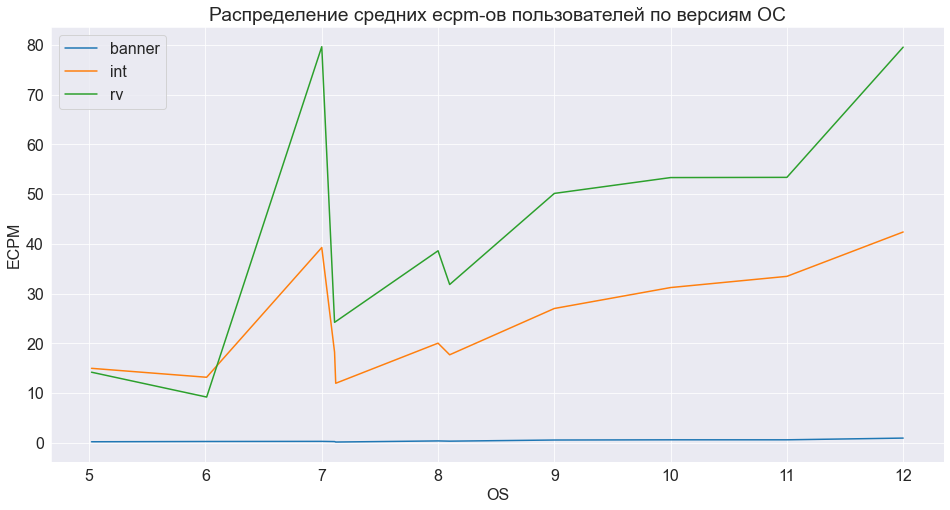

In [41]:
plt.figure(figsize=(16,8))
plt.plot(os_ecpm_banner, label = 'banner')
plt.plot(os_ecpm_int, label = 'int')
plt.plot(os_ecpm_rv, label = 'rv')
plt.title('Распределение средних ecpm-ов пользователей по версиям ОС')
plt.xlabel('OS')
plt.ylabel('ECPM')
plt.legend()
plt.show()

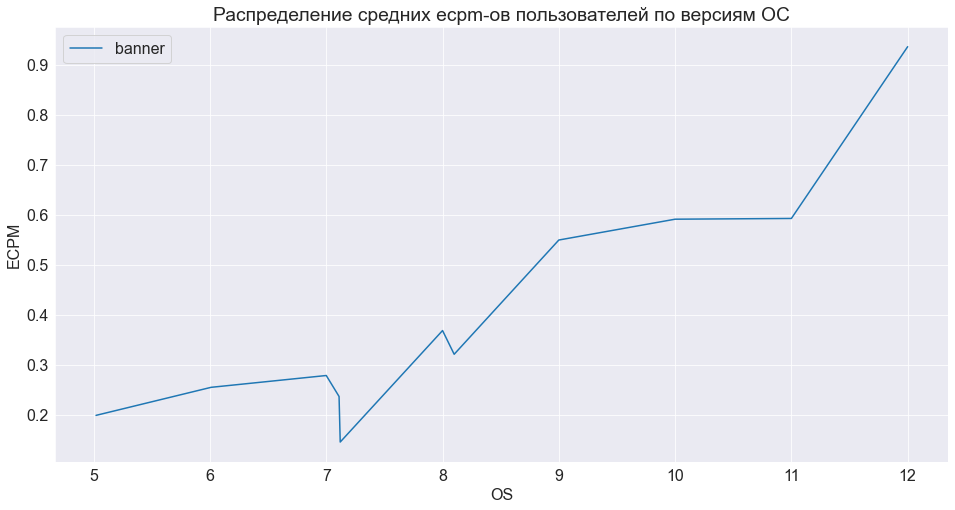

In [42]:
plt.figure(figsize=(16,8))
plt.plot(os_ecpm_banner, label = 'banner')
plt.title('Распределение средних ecpm-ов пользователей по версиям ОС')
plt.xlabel('OS')
plt.ylabel('ECPM')
plt.legend()
plt.show()

### Распределение средних ECPM по версиям ОС дает много полезной информации. Из графика видно, что наибольший средний ECPM приносят пользователи с версией ОС 7.0; 11.0 и 12.0.
### Из чего можно сделать вывод, что реклама должна быть ориентирована на пользователей с самой популярной версией ОС 7.0 и на пользователей с новыми операционными системами.
### Что абсолютно логично, ведь пользователи со старой операционной системой не могут воспользоваться большинством рекламных предложений, так как они не поддерживаются устройствами.
### Отдельно нарисован график ECPM для баннеров, так как доход от них намного ниже, чем от других видов рекламы, но тенденция сохраняется, за исключением версии ОС 7.0, для которой ECPM ниже среднего по всем версиям ОС.

# До этого были изучены распределения средних ECPM. теперь посмотрим на общий доход от показа рекламы по пользователям, городам и версиям ОС.

In [43]:
sum_ecpm_banner = df[df['ad_type']=='B'].groupby('profile_id')['ecpm'].sum().sort_values(ascending = False)
sum_ecpm_int = df[df['ad_type']=='I'].groupby('profile_id')['ecpm'].sum().sort_values(ascending = False)
sum_ecpm_rv = df[df['ad_type']=='RV'].groupby('profile_id')['ecpm'].sum().sort_values(ascending = False)

Text(0, 0.5, 'частота')

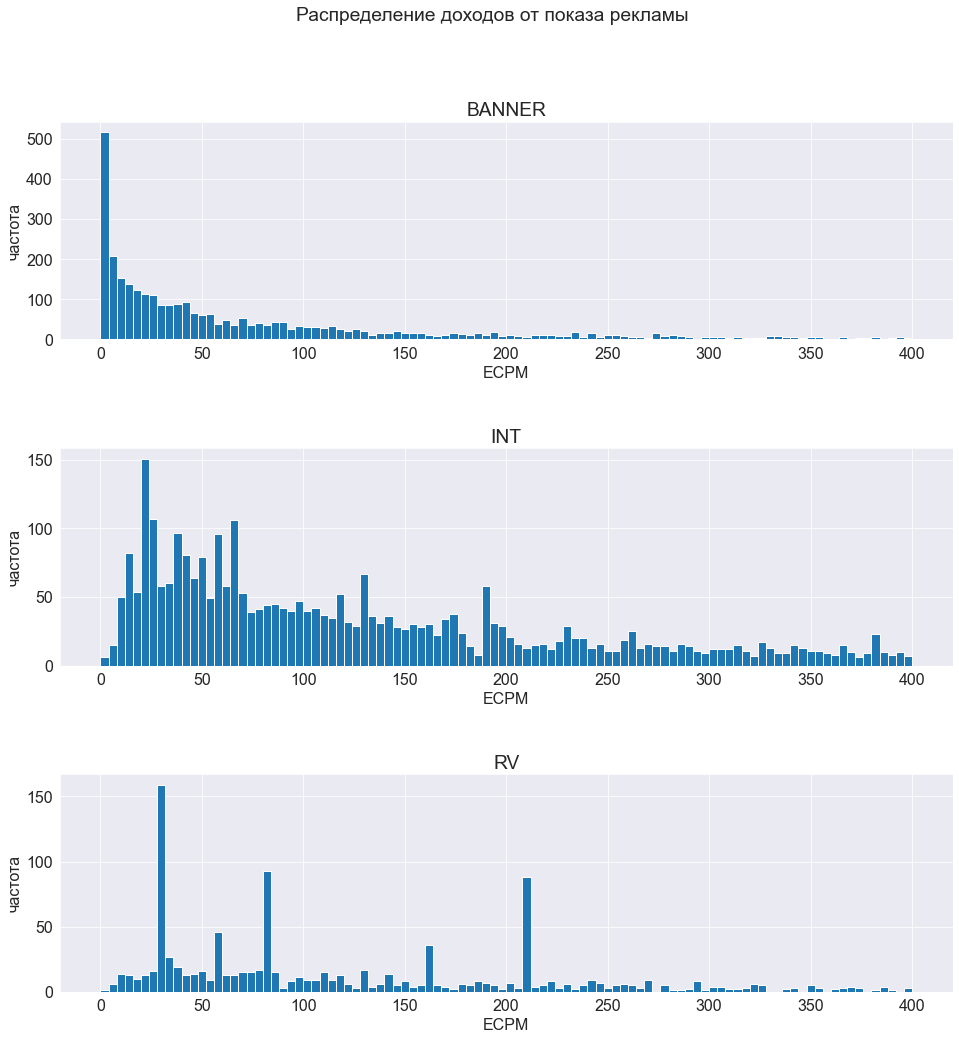

In [44]:
fig, axs = plt.subplots(3, 1)
plt.suptitle("Распределение доходов от показа рекламы")
plt.rcParams['font.size'] = '16'
fig.subplots_adjust(hspace = 0.5)
fig.set_figheight(16)
fig.set_figwidth(16)
axs[0].hist(sum_ecpm_banner,bins = 100, range = (0,400))
axs[0].set_title('BANNER')
axs[0].set_xlabel('ECPM')
axs[0].set_ylabel('частота')
axs[1].hist(sum_ecpm_int,bins = 100, range = (0,400))
axs[1].set_title('INT')
axs[1].set_xlabel('ECPM')
axs[1].set_ylabel('частота')
axs[2].hist(sum_ecpm_rv,bins = 100, range = (0,400))
axs[2].set_title('RV')
axs[2].set_xlabel('ECPM')
axs[2].set_ylabel('частота')

### Графики с общим доходом от показа рекламы пользователям  выглядят более насыщенно. 
### Тем не менее, сложно выделить какую-то важную новую информацию, которая не была получена из графиков средних ECPM

In [45]:
city_sum_ecpm = df.groupby('city')['ecpm'].sum().sort_values(ascending = False)

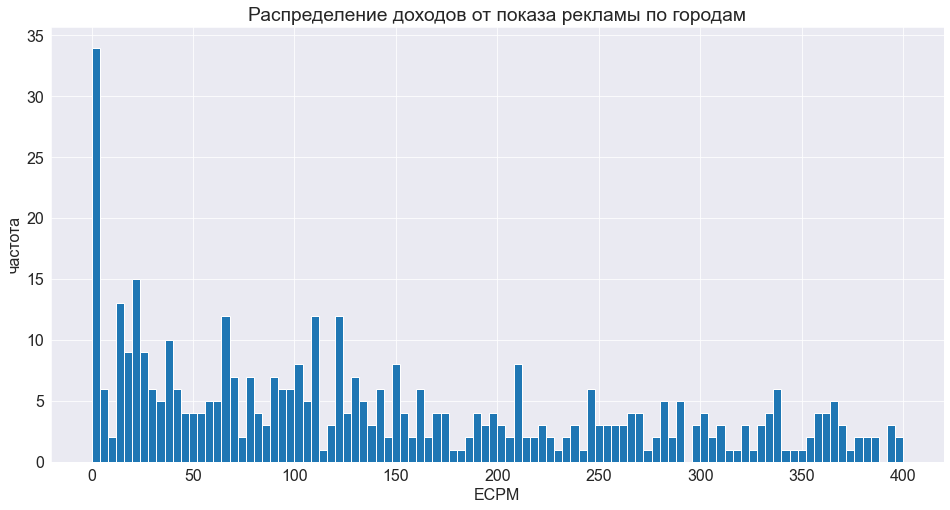

In [46]:
plt.figure(figsize=(16,8))
plt.hist(city_sum_ecpm,bins = 100, range = (0,400)) 
plt.title('Распределение доходов от показа рекламы по городам')
plt.xlabel('ECPM')
plt.ylabel('частота')
plt.show()

### Опять же, города стоит сгруппировать по категориям. но городов много и это заняло бы больше времени, чем ушло на выполнение всего задания.

In [47]:
os_ecpm_sum_banner = df[df['ad_type']=='B'].groupby('os_version')['ecpm'].sum()
os_ecpm_sum_int = df[df['ad_type']=='I'].groupby('os_version')['ecpm'].sum()
os_ecpm_sum_rv = df[df['ad_type']=='RV'].groupby('os_version')['ecpm'].sum()

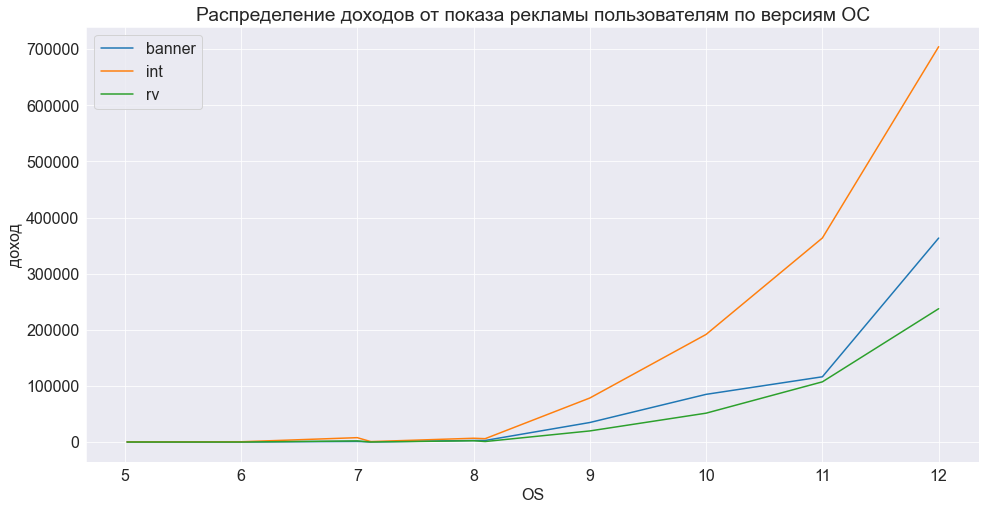

In [48]:
plt.figure(figsize=(16,8))
plt.plot(os_ecpm_sum_banner, label = 'banner')
plt.plot(os_ecpm_sum_int, label = 'int')
plt.plot(os_ecpm_sum_rv, label = 'rv')
plt.title('Распределение доходов от показа рекламы пользователям по версиям ОС')
plt.xlabel('OS')
plt.ylabel('доход')
plt.legend()
plt.show()

### Гипотеза, выдвинутая после анализа распределения средних ECPM от версии OS, практически полностью подтвердилась графиком общих доходов от версии ОС.
### Наибольший доход приносят пользователи с последними версиями ОС. 
### Ошибка в гипотезе заключалась в переооценке 7 версии ОС. Среднее значение ECPM у версии 7 соотносимо со средним значением у поздних версий. Но общий доход от показа рекламы пользователяем с более поздней версией ОС намного выше, чем доход для популярной версии 7.
### Из чего можем окончательно сделать вывод, что реклама лучше работает с пользователями, у которых новые версии ОС ( Дороже устройства, выше доход пользователя, следовательно, он может больше потратить, увидев рекламу).

# Дополнительное задание

In [49]:
df.head(10)

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_datetime,event_receive_datetime,operator_name,city,ad_type,placement,view_index,ads_ltv,session_length,ecpm_sma,normalized_ecpm_sma,ecpm
0,JLjpGzDHBQm,11.0,Samsung,Galaxy Tab S6,T,US,20:02:28,17:58:19,NaN,Norwalk,B,--,1,0.487876676518837,705.8807,0.511508,0.511508,0.510313
1,JLjpGzDHBQm,11.0,Samsung,Galaxy Tab S6,T,US,20:02:45,17:58:19,NaN,Norwalk,B,--,1,0.488386989518837,722.6512,0.511389,0.511389,0.510313
2,JLkVacrzHY6,11.0,Google,Pixel 2,P,US,17:53:05,16:59:29,Verizon,Charlotte,B,--,1,0.67847875732725,431.8129,0.928597,0.928597,2.386163
3,JMC6wG3cX0f,10.0,Samsung,Galaxy S9,P,US,17:09:01,17:09:24,T-Mobile,Cocoa,I,N_LVL,1,0.0138937835693359,125.9496,13.782633,13.893784,13.893784
4,JLzWWTJfi1b,10.0,Samsung,Galaxy S9,P,US,17:15:38,17:16:16,Verizon,NaN,B,--,1,0.0605709444258423,12.71129,1.660282,1.660282,6.827570
5,JLzWWTJfi1b,10.0,Samsung,Galaxy S9,P,US,17:15:53,17:16:16,Verizon,NaN,B,--,1,0.0610651404258423,27.753,1.543673,1.543673,0.494196
6,JLzWWTJfi1b,10.0,Samsung,Galaxy S9,P,US,17:16:03,17:16:16,Verizon,NaN,B,--,1,0.0634513029258423,37.62716,1.627922,1.627922,2.386163
7,JLzWWTJfi1b,10.0,Samsung,Galaxy S9,P,US,17:16:23,17:17:11,Verizon,NaN,B,--,1,0.0639454989258423,57.81027,1.514549,1.514549,0.494196
8,JLzWWTJfi1b,10.0,Samsung,Galaxy S9,P,US,17:16:33,17:17:11,Verizon,NaN,B,--,1,0.0663316614258423,67.62502,1.601711,1.601711,2.386163
9,JLzWWTJfi1b,10.0,Samsung,Galaxy S9,P,US,17:16:53,17:17:11,Verizon,NaN,B,--,1,0.0668258574258423,87.8036,1.490959,1.490959,0.494196


In [50]:
sum_ecpm_with_city = df.groupby(['profile_id','city'], as_index=False)['ecpm'].sum()

In [51]:
sum_ecpm = df.groupby(['profile_id'], as_index=False)['ecpm'].sum()

In [52]:
prc =(len(sum_ecpm_with_city)/len(sum_ecpm))*100
print(prc)

82.27638428774254


### 82,2% доходов содержат информацию о городе пользователя

In [53]:
df_dop = df.copy()

In [54]:
def time_to_quarter(time):  # функция перевода времени в часы
    clock = int(time[:2])
    return clock

In [55]:
df_dop['event_datetime'] = [time_to_quarter(cell) for cell in df_dop['event_datetime']] 

In [56]:
mean_ecpm_time = df_dop.groupby(['event_datetime'])['ecpm'].mean()

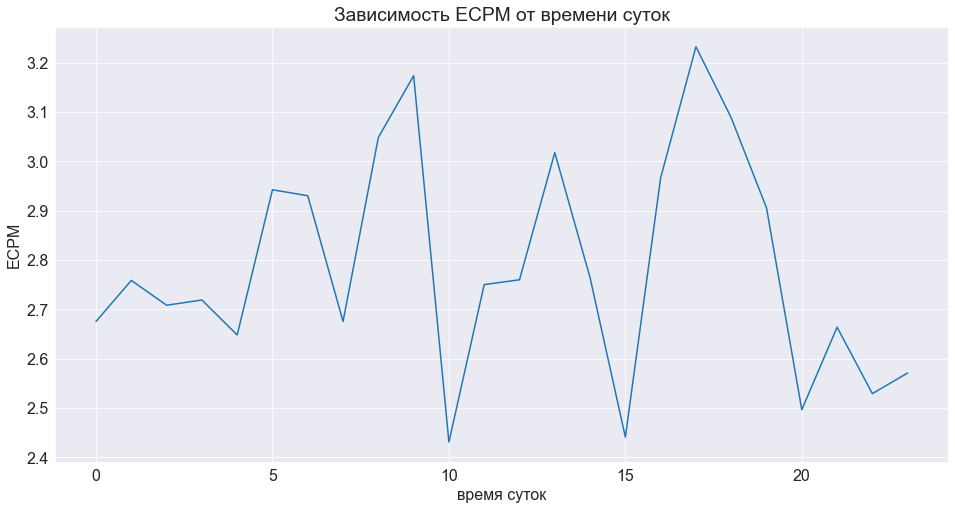

In [57]:
plt.figure(figsize=(16,8))
plt.plot(mean_ecpm_time) 
plt.title('Зависимость ECPM от времени суток')
plt.xlabel('время суток')
plt.ylabel('ECPM')
plt.show()

### ECPM, вполне ожидаемо, зависит от времени суток. Пики находятся на 9, 13 и 16 часах. Люди едут на работу, обедают и едут с работы, играя в любимую игру и просматривая рекламу.

# Исследования вне задания

In [58]:
sum_ecpm_country = df_dop.groupby(['device_locale'])['ecpm'].sum().sort_values(ascending = False)

In [59]:
sum_ecpm_country

device_locale
US         2.382026e+06
CA         3.390846e+03
GB         3.017307e+03
IN         1.114187e+03
KR         6.243456e+02
NL         3.579153e+02
AU         1.050098e+02
unknown    1.017237e+02
FR         6.109942e+01
Name: ecpm, dtype: float64

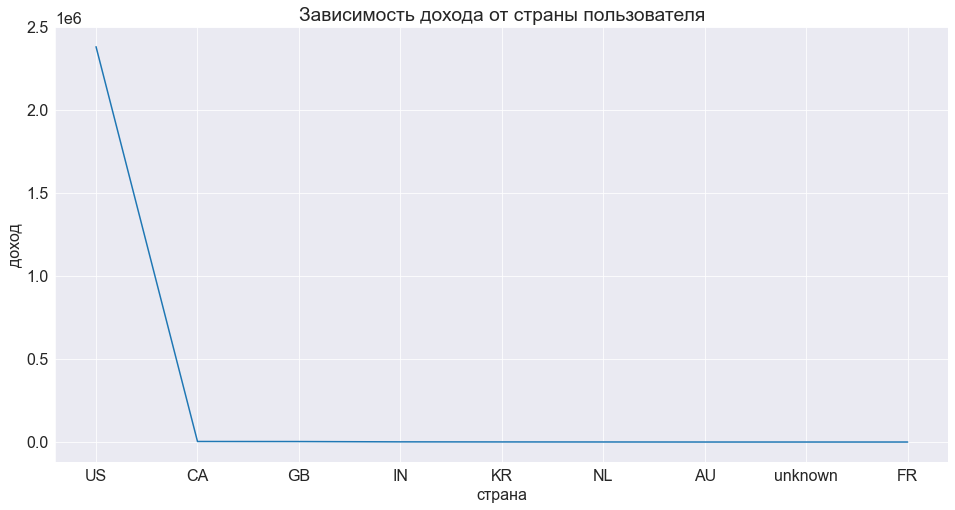

In [60]:
plt.figure(figsize=(16,8))
plt.plot(sum_ecpm_country) 
plt.title('Зависимость дохода от страны пользователя')
plt.xlabel('страна')
plt.ylabel('доход')
plt.show()

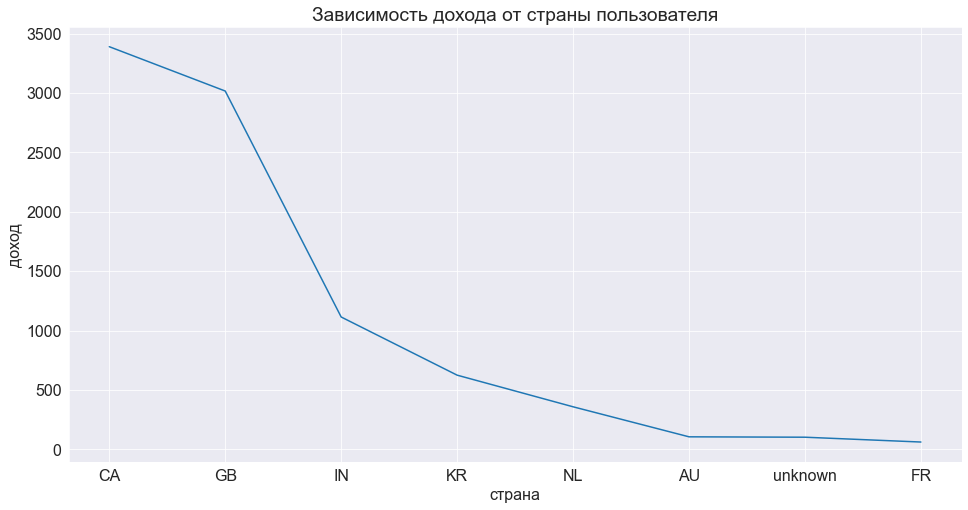

In [61]:
plt.figure(figsize=(16,8))
plt.plot(sum_ecpm_country[1:]) 
plt.title('Зависимость дохода от страны пользователя')
plt.xlabel('страна')
plt.ylabel('доход')
plt.show()

### Мне кажется, что данный график дает больше информации, чем зависимость дохода от города.
### Теперь очевидно, что основной доход идет из США. И стоит рассмотреть, например, зависимость дохода от штата США, в котором находится город. Может быть доход приносят в основном республиканцы, и тогда стоит подогнать рекламу под них, чтобы доход вырос еще сильнее.